# SC1015 A133 Group 6 - Mini Project

This project is aims to accurately predict whether a patient will have stroke based on some common factors amongs stroke patients. The dataset is from Kaggle. In this notebook, you will find the complete analysis we had done for this project. <br>
This notebook contains <br> 
- Artifical Neural Network

In [2]:
# Importing the necessary packages
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import plot_tree
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [3]:
np.random.seed(100)

In [4]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# One Hot Encoding

We use OneHotEncoding to encode categorical variables into its numeric values. There are 7 categorical variables that needed to be encoded.

In [5]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
data_cat = data[['ever_married','work_type','Residence_type','smoking_status','gender','hypertension','heart_disease']]
ohe.fit(data_cat)
data_cat_ohe = pd.DataFrame(ohe.transform(data_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(data_cat.columns))

# Check the encoded variables
data_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ever_married_No                 5110 non-null   float64
 1   ever_married_Yes                5110 non-null   float64
 2   work_type_Govt_job              5110 non-null   float64
 3   work_type_Never_worked          5110 non-null   float64
 4   work_type_Private               5110 non-null   float64
 5   work_type_Self-employed         5110 non-null   float64
 6   work_type_children              5110 non-null   float64
 7   Residence_type_Rural            5110 non-null   float64
 8   Residence_type_Urban            5110 non-null   float64
 9   smoking_status_Unknown          5110 non-null   float64
 10  smoking_status_formerly smoked  5110 non-null   float64
 11  smoking_status_never smoked     5110 non-null   float64
 12  smoking_status_smokes           51

In [6]:
data_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ever_married_No                 5110 non-null   float64
 1   ever_married_Yes                5110 non-null   float64
 2   work_type_Govt_job              5110 non-null   float64
 3   work_type_Never_worked          5110 non-null   float64
 4   work_type_Private               5110 non-null   float64
 5   work_type_Self-employed         5110 non-null   float64
 6   work_type_children              5110 non-null   float64
 7   Residence_type_Rural            5110 non-null   float64
 8   Residence_type_Urban            5110 non-null   float64
 9   smoking_status_Unknown          5110 non-null   float64
 10  smoking_status_formerly smoked  5110 non-null   float64
 11  smoking_status_never smoked     5110 non-null   float64
 12  smoking_status_smokes           51

In [7]:
# Combining Numeric features with the OHE Categorical features
data_num = data[['age','avg_glucose_level','bmi']]
data_res = data['stroke']
data_ohe = pd.concat([data_num, data_cat_ohe, data_res], 
                           sort = False, axis = 1).reindex(index=data_num.index)

# Check the final dataframe
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   avg_glucose_level               5110 non-null   float64
 2   bmi                             4909 non-null   float64
 3   ever_married_No                 5110 non-null   float64
 4   ever_married_Yes                5110 non-null   float64
 5   work_type_Govt_job              5110 non-null   float64
 6   work_type_Never_worked          5110 non-null   float64
 7   work_type_Private               5110 non-null   float64
 8   work_type_Self-employed         5110 non-null   float64
 9   work_type_children              5110 non-null   float64
 10  Residence_type_Rural            5110 non-null   float64
 11  Residence_type_Urban            5110 non-null   float64
 12  smoking_status_Unknown          51

In [8]:
data_ohe = data_ohe.fillna(0)
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   avg_glucose_level               5110 non-null   float64
 2   bmi                             5110 non-null   float64
 3   ever_married_No                 5110 non-null   float64
 4   ever_married_Yes                5110 non-null   float64
 5   work_type_Govt_job              5110 non-null   float64
 6   work_type_Never_worked          5110 non-null   float64
 7   work_type_Private               5110 non-null   float64
 8   work_type_Self-employed         5110 non-null   float64
 9   work_type_children              5110 non-null   float64
 10  Residence_type_Rural            5110 non-null   float64
 11  Residence_type_Urban            5110 non-null   float64
 12  smoking_status_Unknown          51

# Balance the class imbalance of 'Stroke' vs 'No Stroke'

In [9]:
dataStroke = data_ohe[data_ohe.stroke == 1]
dataNoStroke = data_ohe[data_ohe.stroke == 0]
 
dataStroke_up = resample(dataStroke, 
                        replace=True,                     # sample with replacement
                        n_samples=dataNoStroke.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up = pd.concat([dataStroke_up, dataNoStroke])
 
# Check the ratio of the classes
data_ohe_up['stroke'].value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [10]:
data_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9722 entries, 8 to 5109
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             9722 non-null   float64
 1   avg_glucose_level               9722 non-null   float64
 2   bmi                             9722 non-null   float64
 3   ever_married_No                 9722 non-null   float64
 4   ever_married_Yes                9722 non-null   float64
 5   work_type_Govt_job              9722 non-null   float64
 6   work_type_Never_worked          9722 non-null   float64
 7   work_type_Private               9722 non-null   float64
 8   work_type_Self-employed         9722 non-null   float64
 9   work_type_children              9722 non-null   float64
 10  Residence_type_Rural            9722 non-null   float64
 11  Residence_type_Urban            9722 non-null   float64
 12  smoking_status_Unknown          97

# Implementing Artifical Neural Network

We will be using MLPClassifier from Sci-kit learn library to implement an artificial neural network. Multilayer perceptron (MLP) algorithm is a class of feedforward neural network used for classification such as in this case.

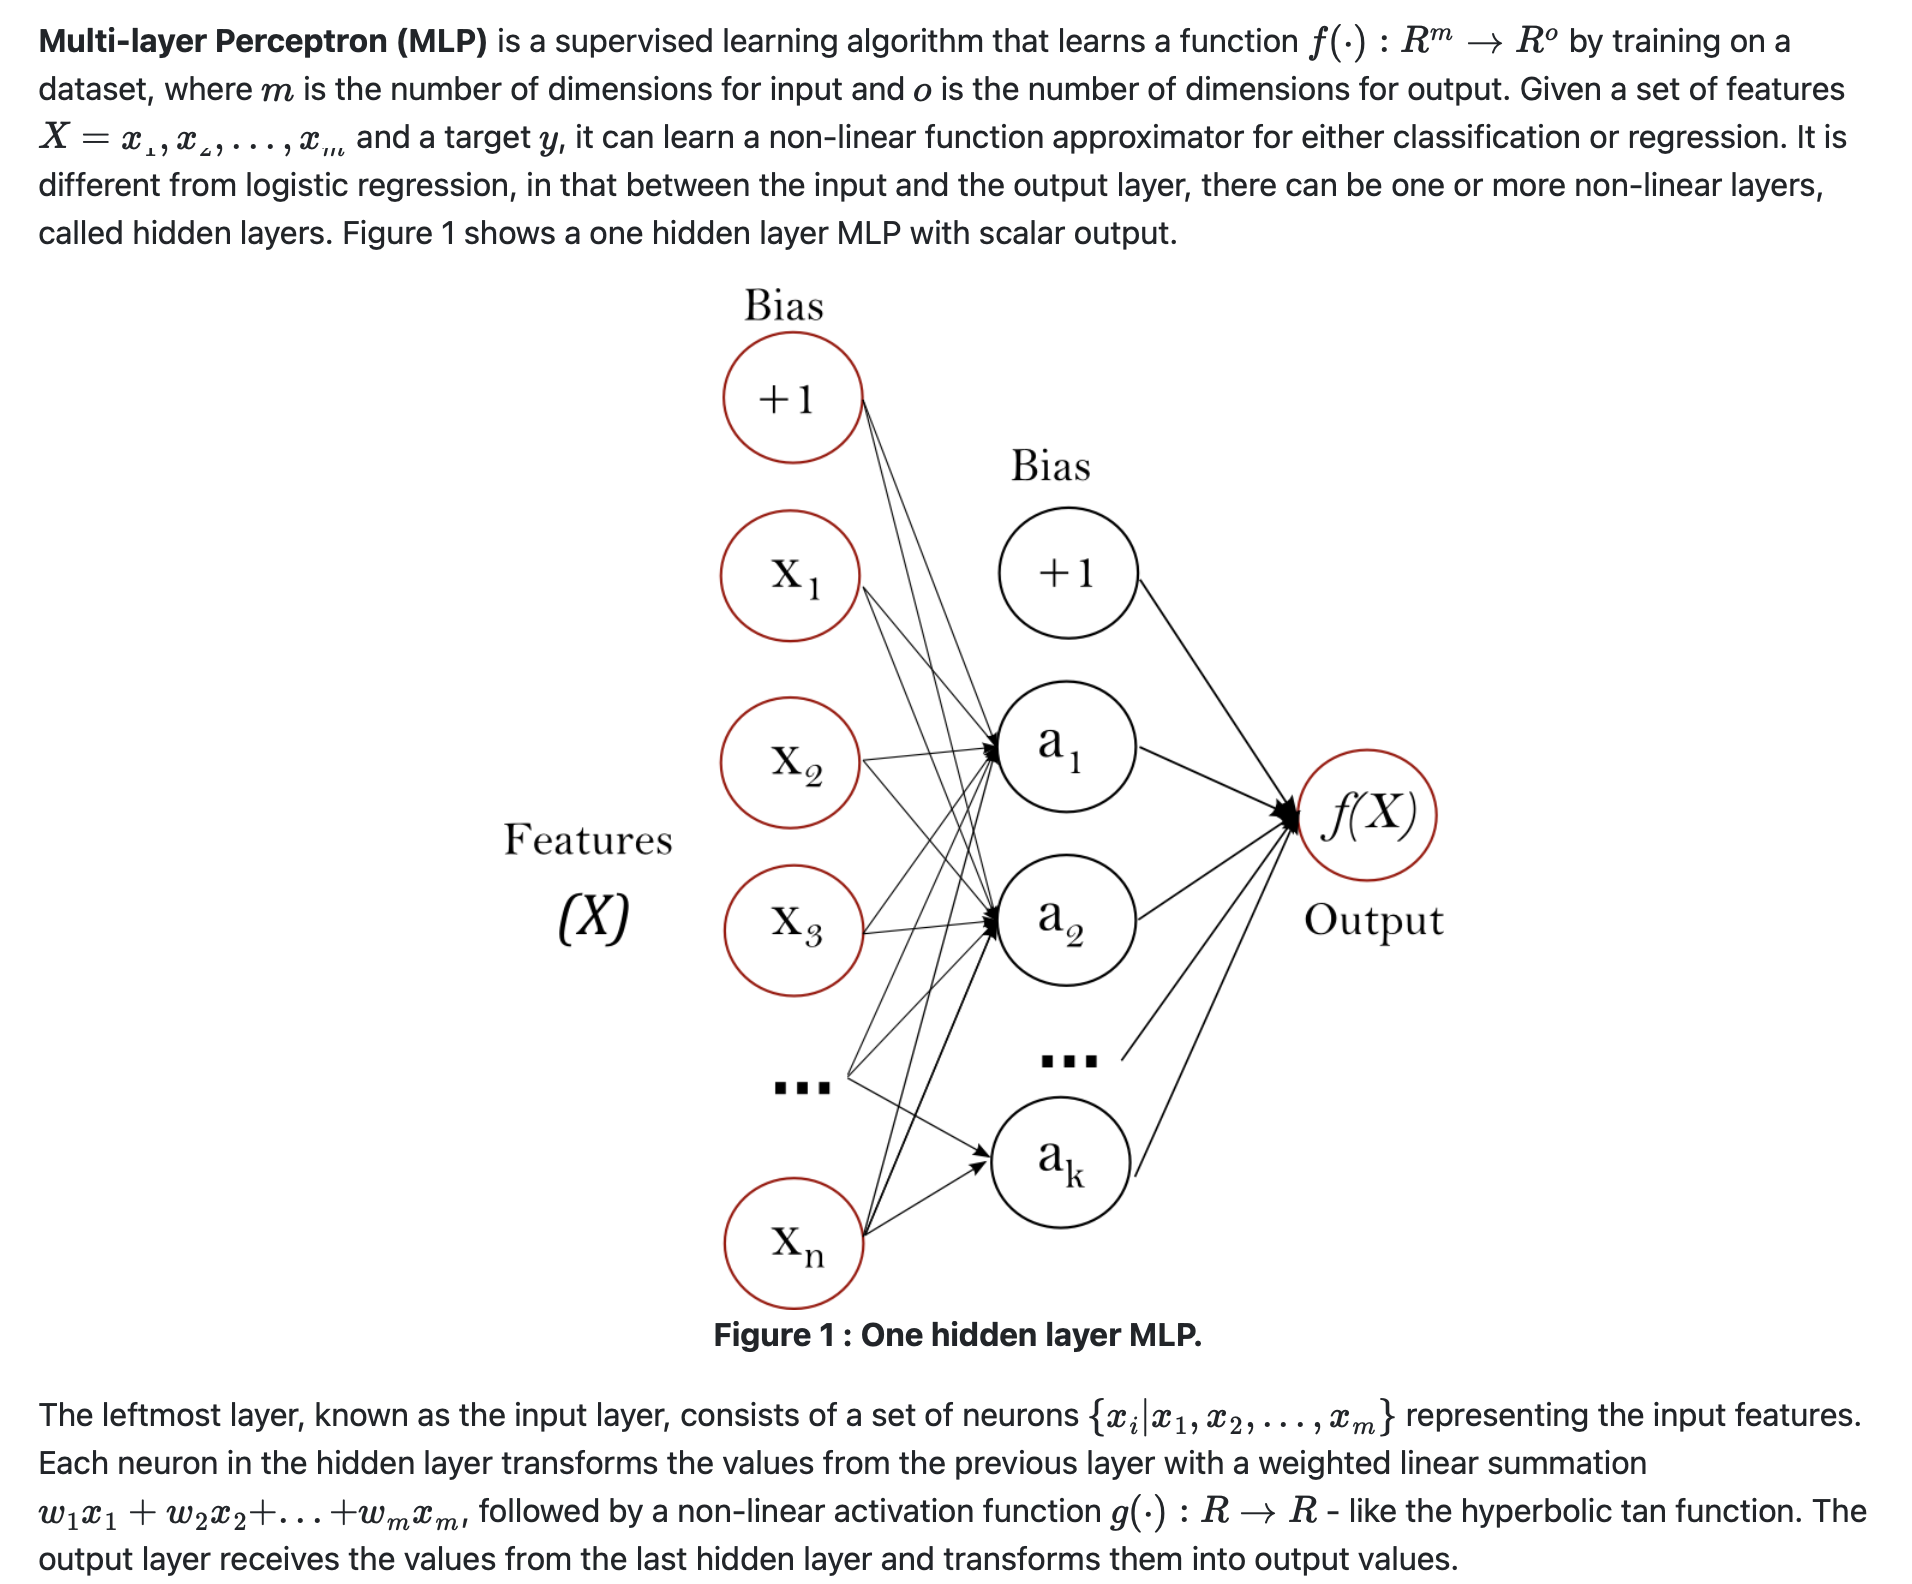

In [11]:
train, test = train_test_split(data_ohe_up, random_state = 42)
X_train = train[train.columns[0:21]]
y_train = train['stroke']
X_test = test[test.columns[0:21]]
y_test = test['stroke']

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
MLP = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter = 1000)
MLP.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [14]:
predictions = MLP.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      1190
           1       0.84      0.96      0.90      1241

    accuracy                           0.89      2431
   macro avg       0.90      0.88      0.89      2431
weighted avg       0.89      0.89      0.89      2431



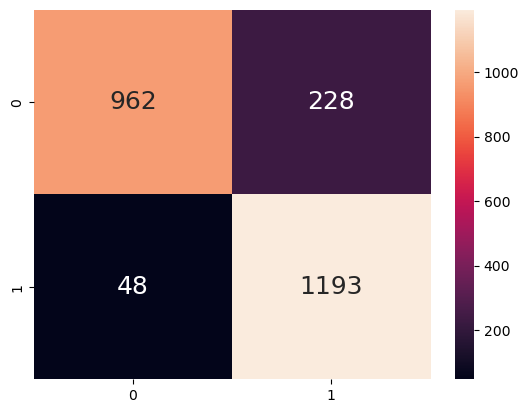

In [15]:
sb.heatmap(confusion_matrix(y_test, predictions), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
print(classification_report(y_test,predictions))

## Insights from using MLPClassifier
From our findings, we can see that we achieved a relatively high accuracy and f1-score. We can actually still refine the model by increasing input layers, neurons per layer as well as the iteration numbers to achieve a better result although at a higher computational cost and time. From this model, one drawback is that finding the right parameters has to be done iteratively, and therefore could result in lower efficiency when fine-tuning to achieve the best accuracy.
